# Preliminary

In [ ]:
%load_ext autoreload
%autoreload 2

In [17]:
import sys
sys.path.append('dcs')
%aimport dcs 

import pandas as pd
import numpy as np

In [2]:
dataset_name = 'support'
test_size = .2
random_seed = 40

# Dataset

In [3]:
dataset = dcs.datasets.get_dataset(dataset_name)
pipeline = dcs.pipelines.get_pipeline(dataset_name)
display(dataset.head())

train_X, train_y, test_X, test_y = dcs.preprocessing.train_test_split_X_y(
    dataset,
    random_state=random_seed,
    test_size=test_size)

train_X_t = pipeline.fit_transform(train_X)
test_X_t = pipeline.transform(test_X)

display(train_X_t.head())

,event_days,has_event,age,sex,race,no_comorbidities,diabetes,dementia,cancer,mean_arterial_blood_pressure,heart_rate,respiration_rate,temperature,no_white_blood_cells,serum_sodium,serum_creatinine
patient_id,,,,,,,,,,,,,,,,
s-0000,30.0,1,82.709961,1.0,2.0,1.0,0.0,0.0,0.0,160.0,55.0,16.0,38.195309,142.0,19.000000,1.099854
s-0001,1527.0,0,79.660950,1.0,0.0,1.0,0.0,0.0,1.0,54.0,67.0,16.0,38.000000,142.0,10.000000,0.899902
s-0002,96.0,1,23.399990,1.0,2.0,3.0,0.0,0.0,1.0,87.0,144.0,45.0,37.296879,130.0,5.199219,1.199951
s-0003,892.0,0,53.075989,1.0,4.0,3.0,0.0,0.0,0.0,55.0,100.0,18.0,36.000000,135.0,8.699219,0.799927
s-0004,7.0,1,71.794983,0.0,1.0,1.0,0.0,0.0,0.0,65.0,135.0,40.0,38.593750,146.0,0.099991,0.399963


,age,sex,no_comorbidities,diabetes,dementia,mean_arterial_blood_pressure,heart_rate,respiration_rate,temperature,no_white_blood_cells,...,race_2.0,race_3.0,race_4.0,race_5.0,race_6.0,race_7.0,race_8.0,race_9.0,cancer_1.0,cancer_2.0
patient_id,,,,,,,,,,,,,,,,,,,,,
s-2015,0.705584,0.0,-0.400374,0.0,0.0,0.296886,-0.471875,-0.372758,-0.562731,-0.746259,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
s-1795,0.186970,0.0,-0.400374,0.0,0.0,1.403533,-1.492248,-0.797315,-0.165417,0.406433,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
s-3146,-0.267826,1.0,-0.400374,0.0,0.0,-0.662208,1.206803,-1.434150,0.709912,1.229784,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
s-4791,0.876985,0.0,-0.400374,0.0,0.0,0.665768,0.778904,-0.372758,-0.246121,0.077092,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
s-6658,-1.213508,1.0,-0.400374,0.0,0.0,1.846192,1.042226,0.264077,0.387095,0.900444,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Models

In [4]:
predictions = {}

## CoxPH

In [5]:
cox = dcs.models.CoxPH(verbose=True)
cox.fit(train_X_t, train_y)
predictions['CoxPH'] = cox.predict(test_X_t)

Iteration 1: norm_delta = 0.51060, step_size = 0.5000, log_lik = -40242.83857, newton_decrement = 408.11866, seconds_since_start = 0.3
Iteration 2: norm_delta = 0.22533, step_size = 0.5000, log_lik = -39939.53250, newton_decrement = 90.65743, seconds_since_start = 0.7
Iteration 3: norm_delta = 0.11639, step_size = 0.5000, log_lik = -39871.50371, newton_decrement = 23.09225, seconds_since_start = 1.1
Iteration 4: norm_delta = 0.04466, step_size = 0.6500, log_lik = -39851.18543, newton_decrement = 3.01815, seconds_since_start = 1.4
Iteration 5: norm_delta = 0.01384, step_size = 0.8450, log_lik = -39848.21761, newton_decrement = 0.11486, seconds_since_start = 1.7
Iteration 6: norm_delta = 0.01169, step_size = 1.0000, log_lik = -39848.09226, newton_decrement = 0.01436, seconds_since_start = 2.1
Iteration 7: norm_delta = 0.01129, step_size = 1.0000, log_lik = -39848.07415, newton_decrement = 0.00503, seconds_since_start = 2.5
Iteration 8: norm_delta = 0.01013, step_size = 1.0000, log_lik = 

<lifelines.CoxPHFitter: fitted with 7098 total observations, 2264 right-censored observations>
             duration col = 'duration'
                event col = 'events'
                penalizer = 0.0001
                 l1 ratio = 0
      baseline estimation = breslow
   number of observations = 7098
number of events observed = 4834
   partial log-likelihood = -39848.07
         time fit was run = 2022-03-30 07:35:00 UTC

---
                               coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                            
age                            0.20       1.22       0.02             0.17             0.23                 1.19                 1.26
sex                           -0.06       0.94       0.03            -0.12            -0.01                 0.89                 0.99
no_comorbidities               0.02       1.02       0.01            -0.01             0.05                 0.99                 1.05
diabetes                       0.01       1.01       0.04            -0.06             0.09                 0.94                 1.10
dementia                       0.30       1.35       0.08             0.15             0.45                 1.16                 1.56
mean_arterial_blood_pressure  -0.08       0.93       0.02            -0.11            -0.05                 0.90                 0.95
heart_rate                     0.09       1.10       0.02             0.06             0.12                 1.07                 1.13
respiration_rate               0.03       1.04       0.02             0.00             0.06                 1.00                 1.07
temperature                    0.01       1.01       0.02            -0.02             0.04                 0.98                 1.04
no_white_blood_cells          -0.00       1.00       0.02            -0.03             0.03                 0.97                 1.03
serum_sodium                   0.04       1.04       0.01             0.02             0.07                 1.02                 1.07
serum_creatinine               0.06       1.07       0.01             0.04             0.09                 1.04                 1.09
race_1.0                       0.18       1.20       0.06             0.08             0.29                 1.08                 1.34
race_2.0                       0.19       1.21       0.06             0.08             0.30                 1.08                 1.35
race_3.0                       0.17       1.19       0.06             0.05             0.30                 1.05                 1.34
race_4.0                       0.16       1.18       0.07             0.02             0.31                 1.02                 1.36
race_5.0                       0.39       1.48       0.10             0.20             0.58                 1.22                 1.79
race_6.0                       0.10       1.11       0.15            -0.19             0.40                 0.82                 1.49
race_7.0                       0.25       1.29       0.30            -0.33             0.83                 0.72                 2.30
race_8.0                       1.03       2.79       0.71            -0.37             2.42                 0.69                11.23
race_9.0                      -7.16       0.00      35.00           -75.75            61.43                 0.00             4.77e+26
cancer_1.0                    -0.75       0.47       0.04            -0.82            -0.67                 0.44                 0.51
cancer_2.0                    -0.33       0.72       0.05            -0.43            -0.24                 0.65                 0.79

                                  z      p   -log2(p)
covariate                                            
age                           12.40 <0.005     114.81
sex                           -2.16   0.03       5.01


CoxPH(verbose=True)

In [24]:
deepsurv = dcs.models.DeepSurv(verbose=True)
deepsurv.fit(train_X_t, train_y)
predictions['DeepSurv'] = deepsurv.predict(test_X_t)

0:	[0s / 0s],		train_loss: 4.4623,	val_loss: 4.2366
1:	[0s / 0s],		train_loss: 4.3665,	val_loss: 4.2192
2:	[0s / 0s],		train_loss: 4.3390,	val_loss: 4.2086
3:	[0s / 1s],		train_loss: 4.3160,	val_loss: 4.2039
4:	[0s / 1s],		train_loss: 4.3054,	val_loss: 4.1996
5:	[0s / 1s],		train_loss: 4.2885,	val_loss: 4.1931
6:	[0s / 1s],		train_loss: 4.2811,	val_loss: 4.1896
7:	[0s / 2s],		train_loss: 4.2790,	val_loss: 4.1862
8:	[0s / 2s],		train_loss: 4.2670,	val_loss: 4.1822
9:	[0s / 2s],		train_loss: 4.2651,	val_loss: 4.1815
10:	[0s / 3s],		train_loss: 4.2680,	val_loss: 4.1770
11:	[0s / 3s],		train_loss: 4.2538,	val_loss: 4.1732
12:	[0s / 3s],		train_loss: 4.2542,	val_loss: 4.1719
13:	[0s / 3s],		train_loss: 4.2496,	val_loss: 4.1684
14:	[0s / 4s],		train_loss: 4.2461,	val_loss: 4.1688
15:	[0s / 4s],		train_loss: 4.2461,	val_loss: 4.1659
16:	[0s / 4s],		train_loss: 4.2431,	val_loss: 4.1641
17:	[0s / 5s],		train_loss: 4.2379,	val_loss: 4.1635
18:	[0s / 5s],		train_loss: 4.2408,	val_loss: 4.1629
19:

In [37]:
coxtime = dcs.models.CoxTime(verbose=True)
coxtime.fit(train_X_t, train_y)
predictions['CoxTime'] = coxtime.predict(test_X_t)

/home/pfuhlert/src/discrete-calibrated-survival/.venv/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


0:	[0s / 0s],		train_loss: 0.7482,	val_loss: 0.6932
1:	[0s / 0s],		train_loss: 0.7024,	val_loss: 0.6749
2:	[0s / 1s],		train_loss: 0.6931,	val_loss: 0.6730
3:	[0s / 1s],		train_loss: 0.6964,	val_loss: 0.6684
4:	[0s / 1s],		train_loss: 0.6916,	val_loss: 0.6680
5:	[0s / 2s],		train_loss: 0.6822,	val_loss: 0.6654
6:	[0s / 2s],		train_loss: 0.6746,	val_loss: 0.6666
7:	[0s / 3s],		train_loss: 0.6693,	val_loss: 0.6634
8:	[0s / 3s],		train_loss: 0.6668,	val_loss: 0.6614
9:	[0s / 3s],		train_loss: 0.6740,	val_loss: 0.6600
10:	[0s / 4s],		train_loss: 0.6698,	val_loss: 0.6523
11:	[0s / 5s],		train_loss: 0.6616,	val_loss: 0.6581
12:	[0s / 5s],		train_loss: 0.6655,	val_loss: 0.6564
13:	[0s / 5s],		train_loss: 0.6628,	val_loss: 0.6518
14:	[0s / 6s],		train_loss: 0.6585,	val_loss: 0.6498
15:	[0s / 6s],		train_loss: 0.6557,	val_loss: 0.6429
16:	[0s / 7s],		train_loss: 0.6608,	val_loss: 0.6480
17:	[0s / 7s],		train_loss: 0.6618,	val_loss: 0.6452
18:	[0s / 7s],		train_loss: 0.6646,	val_loss: 0.6514
19:

TypeError: 'CoxTime' object does not support item assignment

## DRSA

In [49]:
from dcs.models.drsa import Drsa
drsa = Drsa(epochs=1, verbose=True)#dcs.models.DRSA(verbose=True)
drsa.fit(train_X_t, train_y)
predictions['DRSA'] = drsa.predict(test_X_t)


























































































































100%|██████████| 1/1 [00:17<00:00, 17.74s/epoch, loss=2.71e+3]


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_0 (Dense)            (None, 5, 32)             800       
_________________________________________________________________
decoder_0 (LSTM)             (None, 5, 128)            82432     
_________________________________________________________________
output_0 (Dense)             (None, 5, 32)             4128      
_________________________________________________________________
output_1 (Dense)             (None, 5, 1)              33        
Total params: 87,393
Trainable params: 87,393
Non-trainable params: 0
_________________________________________________________________


## DCS

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.


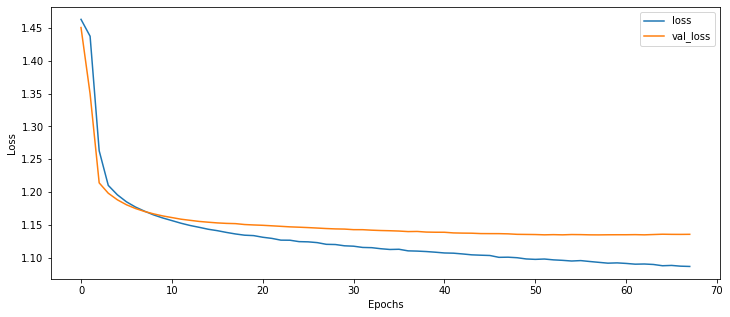

In [7]:
train_max_months = int(np.ceil(train_y['event_days'].max() * 12 / 365))

dcs_model = dcs.models.DcsModel(
    epochs=100, 
    use_early_stopping=True,
    early_stopping_patience=10,
    batch_size=50,
    learning_rate = 1e-4,
    sigma=0.7,
    lambda_=1,
    output_grid_type='quantile',
    output_grid_num_nodes=train_max_months,
    validation_size=.1)

dcs_model.fit(train_X_t, train_y)
dcs_model.plot_history()

dcs_model

In [8]:
predictions['DCS-Model'] = dcs_model.predict(test_X_t)

# Evaluation

## Qualitative Survival Curves

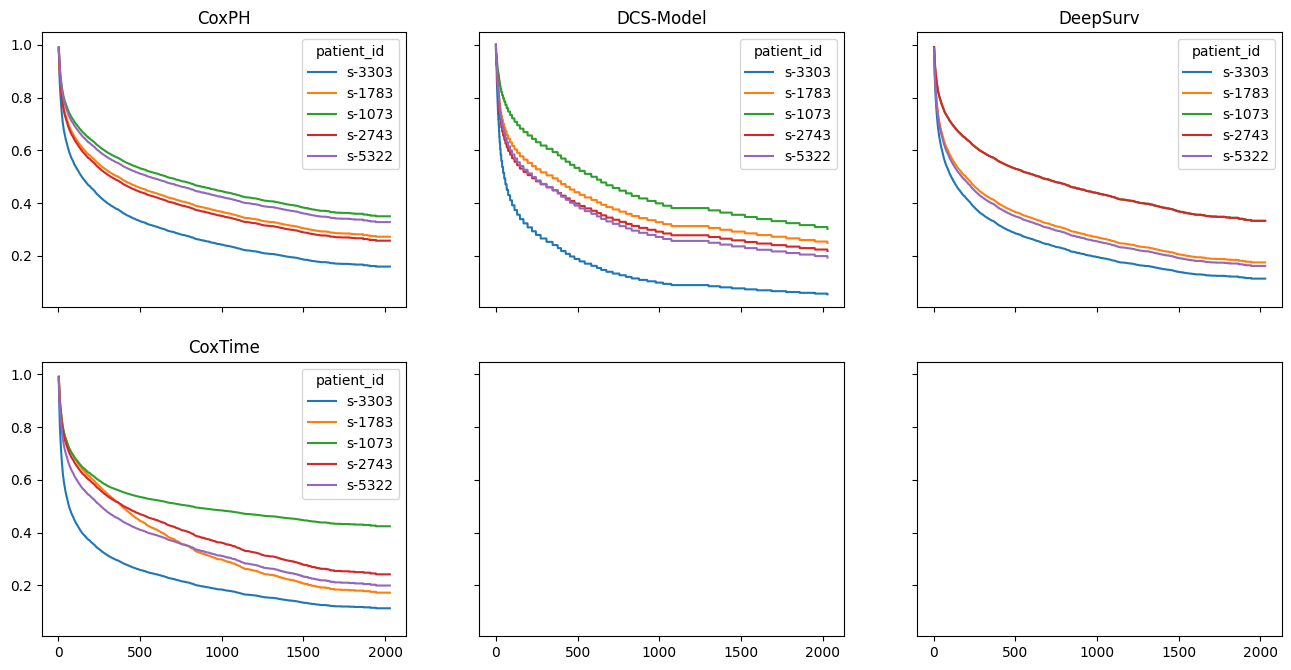

In [43]:
import matplotlib.pyplot as plt

sample_idx = test_X.sample(5).index

nrows=int(np.ceil(len(predictions)/3))

fig, axs = plt.subplots(
    figsize=(16, 4*nrows), dpi=100, 
    ncols=3, nrows=nrows,
    sharex=True, sharey=True)
axs = axs.reshape(-1)

for i, (model_name, prediction) in enumerate(predictions.items()):
    ax = axs[i]
    prediction.loc[sample_idx].T.plot(ax=ax)
    ax.set_title(model_name)


## Quantitative

In [50]:
results_df = pd.DataFrame()
for model_name, prediction in predictions.items():

    results_model = pd.Series({
        "c-index-td": dcs.evaluation.concordance_index_td(test_y, prediction),
        "cdauc": dcs.evaluation.cdauc(test_y, prediction),
        "ddc": dcs.evaluation.ddc(test_y, prediction),
    }, name=model_name)
    
    results_df = results_df.append(results_model)


display(results_df.T)

/home/pfuhlert/src/discrete-calibrated-survival/dcs/evaluation.py:97: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(p != 0, p * np.log(p / q), 0))
/home/pfuhlert/src/discrete-calibrated-survival/dcs/evaluation.py:97: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(p != 0, p * np.log(p / q), 0))


,CoxPH,DCS-Model,DeepSurv,CoxTime,DRSA
c-index-td,0.595550,0.616588,0.605657,0.615186,0.528437
cdauc,0.621955,0.636037,0.638278,0.647169,0.500000
ddc,0.004974,0.040652,0.006523,0.007842,0.848145
